In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
dataset = pd.read_csv("Data.csv")

In [110]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [111]:
X = dataset.iloc[:,:-1].values

In [112]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [113]:
Y = dataset.iloc[:, -1].values
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [114]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [115]:
#we'll encode the categorical data to numbers and for this we'll use sklearn library
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder() #object for class LabelEncoder
labelencoder_X.fit_transform(X[:,0])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [116]:
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [117]:
#We'll use Dummy Encoding bcoz previous encoding signifies Spain has more weightage than others but it's not the case
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0]) #call to class OneHotEncoder


In [118]:
X = onehotencoder.fit_transform(X).toarray()

In [119]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [120]:
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [121]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [122]:
X = X.astype(int)

In [123]:
X

array([[    1,     0,     0,    44, 72000],
       [    0,     0,     1,    27, 48000],
       [    0,     1,     0,    30, 54000],
       [    0,     0,     1,    38, 61000],
       [    0,     1,     0,    40, 63777],
       [    1,     0,     0,    35, 58000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     1,     0,    50, 83000],
       [    1,     0,     0,    37, 67000]])

In [124]:
#Splitting the data into training and test set
from sklearn.cross_validation import train_test_split


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #test data size is 20% of given data and random_state to have same parameters

In [126]:
X_train

array([[    0,     1,     0,    40, 63777],
       [    1,     0,     0,    37, 67000],
       [    0,     0,     1,    27, 48000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     0,     1,    38, 61000],
       [    1,     0,     0,    44, 72000],
       [    1,     0,     0,    35, 58000]])

In [127]:
Y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [128]:
X_test

array([[    0,     1,     0,    30, 54000],
       [    0,     1,     0,    50, 83000]])

In [129]:
Y_test

array([0, 0])

In [130]:
#Feature Scaling~to have values in same range (for calculating eucledian distance)
#Two methods ~ Standardization and Normalization
# Xstand = (x-mean(x))/standard deviation(x)
# Xnorm = (x-min(x))/(max(x)-min(x))
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [131]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.27978024,  0.12374357],
       [ 1.        , -0.37796447, -0.77459667, -0.23673712,  0.4617671 ],
       [-1.        , -0.37796447,  1.29099445, -1.95846165, -1.53092514],
       [-1.        , -0.37796447,  1.29099445, -0.06456467, -1.11141099],
       [ 1.        , -0.37796447, -0.77459667,  1.65715986,  1.72030956],
       [-1.        , -0.37796447,  1.29099445, -0.06456467, -0.16750414],
       [ 1.        , -0.37796447, -0.77459667,  0.96847005,  0.98615979],
       [ 1.        , -0.37796447, -0.77459667, -0.58108203, -0.48213975]])

In [132]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.44194429, -0.90165391],
       [-1.        ,  2.64575131, -0.77459667,  2.00150476,  2.13982372]])

In [133]:
#We don't need to feature scale Y for this dataset as Y can have only two values

In [134]:
#Regression
"""Simple Linear Regression,
Multiple Linear Regression,
Polynomial Regression,
Support Vector for Regression (SVR),
Decision Tree Classification,
Random Forest Classification"""

'Simple Linear Regression,\nMultiple Linear Regression,\nPolynomial Regression,\nSupport Vector for Regression (SVR),\nDecision Tree Classification,\nRandom Forest Classification'

In [135]:
#Simple Linear Regression ~ best fitting line for the given data(min(sum(y-y^)2))
#About Dataset - for determining relationship between salary and years of experience
#y = b1 x+b0, where y is dependent variable, x is independent variable, b1 is coefficient and b0 is constant
# for our dataset, salary = b0 + b1*Experience
dataset1 = pd.read_csv('Salary_Data.csv')


In [136]:
dataset1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [137]:
dataset1 = dataset1.astype(int)

In [138]:
dataset1

,YearsExperience,Salary
0,1,39343
1,1,46205
2,1,37731
3,2,43525
4,2,39891
5,2,56642
6,3,60150
7,3,54445
8,3,64445
9,3,57189


In [148]:
X = dataset1.iloc[:,:-1].values
y = dataset1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [149]:
X_train

array([[ 2],
       [ 5],
       [ 3],
       [ 4],
       [ 8],
       [ 6],
       [ 1],
       [10],
       [ 3],
       [ 2],
       [ 5],
       [ 6],
       [ 3],
       [ 3],
       [ 9],
       [ 2],
       [ 1],
       [ 7],
       [ 4],
       [ 4]])

In [150]:
X_test

array([[ 1],
       [10],
       [ 4],
       [ 3],
       [ 9],
       [ 8],
       [ 9],
       [ 4],
       [ 5],
       [ 7]])

In [151]:
y_train

array([ 56642,  66029,  64445,  61111, 113812,  91738,  46205, 121872,
        60150,  39891,  81363,  93940,  57189,  54445, 105582,  43525,
        39343,  98273,  67938,  56957])

In [152]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302])

In [154]:
#fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [156]:
y_pred

array([ 29873.28070935, 103941.87543252,  54562.81228374,  46332.96842561,
        95712.03157439,  87482.18771626,  95712.03157439,  54562.81228374,
        62792.65614187,  79252.34385813])

In [157]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302])

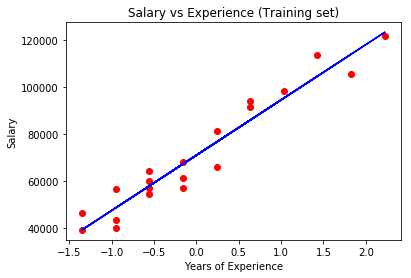

In [161]:
#Visualising the Trainig set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

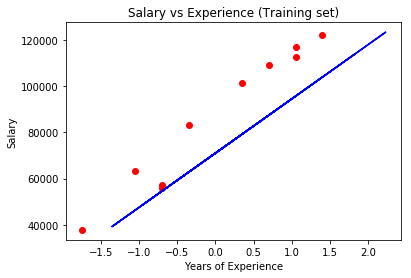

In [162]:
#Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()